# Example 4.2

This is an integration problem with

\begin{align}
I = \int_0^1 [\cos(50x) + \sin(20 x)]^2 \mathrm{d}x
\end{align}
The procedure of estimation is simple. We set $p(x) = \text{Unif}(0, 1)$ and $\varphi(x) = [\cos(50x) + \sin(20 x)]^2$. Then we can estimate $I$ by
\begin{align}
\hat{I} = \frac{1}{N} \sum_{i=1}^N \varphi(x_i)
\end{align}
where $x_i \sim p(x)$. The procedure is given below with computed empirical variance.

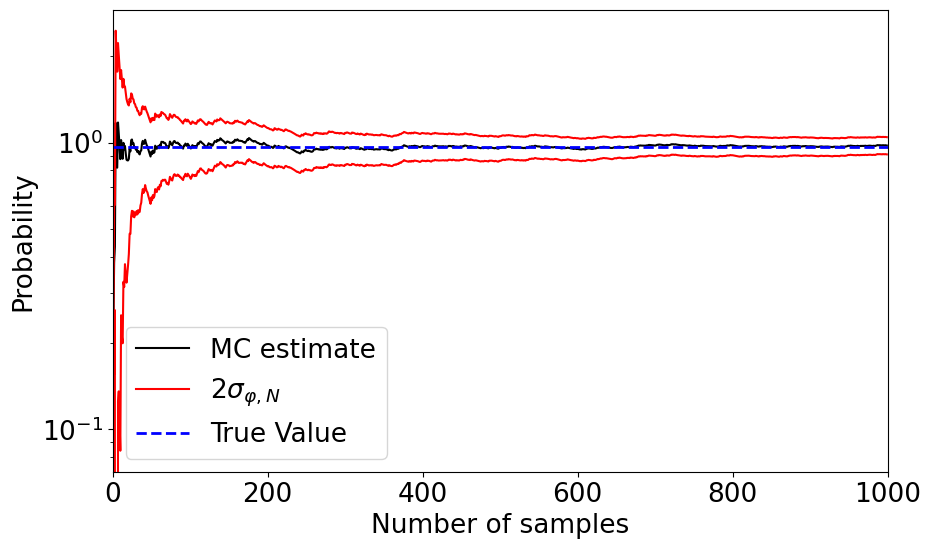

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (np.cos(50 * x) + np.sin(20 * x))**2

I = 0.965 # true value

N = 1000
I_est = np.zeros(N)
I_std = np.zeros(N)

fig = plt.figure(figsize=(10, 6))

u = np.array([])

for n in range(N):

    u = np.append(u, np.random.uniform(0, 1))

    I_est[n] = (1/(n+1)) * np.sum(f(u))

    I_std[n] = np.sqrt((1/((n+1)**2)) * np.sum((f(u) - I_est[n])**2))

plt.clf()
plt.rcParams.update({'font.size': 19})
plt.semilogy(np.arange(1, n+1), I_est[0:n], 'k-', label='MC estimate')
plt.plot(np.arange(1, n+1), I_est[0:n] + 2 * I_std[0:n], 'r', label='2$\sigma_{\\varphi, N}$', alpha=1)
plt.plot(np.arange(1, n+1), I_est[0:n] - 2 * I_std[0:n], 'r', alpha=1)
plt.plot([0, N], [I, I], 'b--', label='True Value', alpha=1, linewidth=2)
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Probability')
# plt.ylim([0.9, 1.1])
plt.xlim([0, N])

plt.show()
